C:\Users\Evan\AppData\Local\Temp\ipykernel_20688\2165018883.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


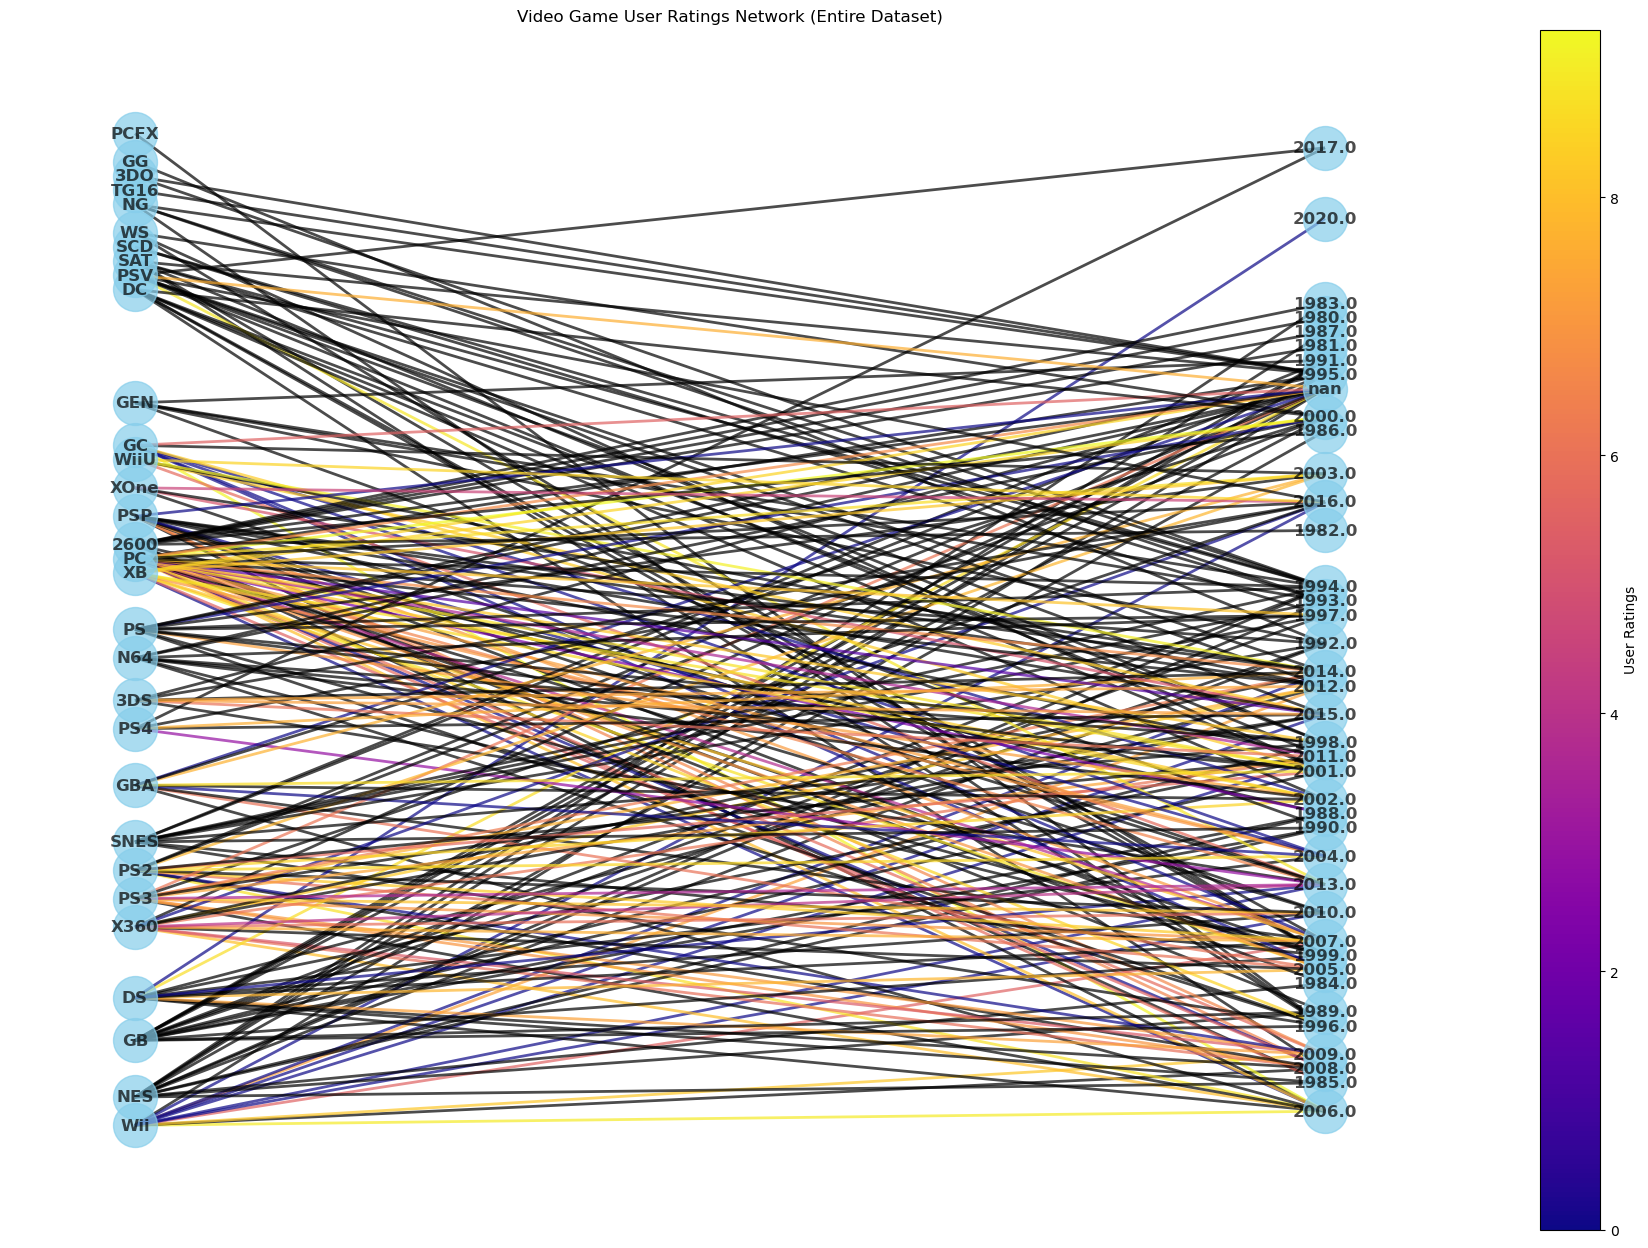

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# I've pulled data from this Kaggle link (https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings/data) and uploaded it to my github.
url = 'https://raw.githubusercontent.com/evanmclaughlin/DATA-620/main/video_game_ratings.csv'
df = pd.read_csv(url)

# I'm going to generate a bipartite graph for my analysis to best 
G = nx.Graph()

# Add nodes and edges to the graph and visualize
for index, row in df.iterrows():
    platform = row['Platform']
    year = str(row['Year_of_Release'])
    user_rating = row['User_Score']
    G.add_node(platform, bipartite=0)
    G.add_node(year, bipartite=1)
    G.add_edge(platform, year, weight=float(user_rating) if user_rating != 'tbd' else 0.0)

# In this version, I'm increasing the size to better view the data, and I'm employing a bipartite layout to position nodes in two rows
plt.figure(figsize=(18, 12)) 
pos = {
    node: (1, i) if data['bipartite'] == 0 else 
          (2, i) for i, (node, data) in enumerate(G.nodes(data=True))
}

# Edge weights for color mapping; color is employed to illustrate the ratings while also connecting platform to year
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = plt.cm.plasma([float(w) / max(edge_weights) for w in edge_weights])
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color=edge_colors, width=2, alpha=0.7)

# I'm adding an enhanced color map to better distinguish between rating numbers
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0, vmax=max(edge_weights)))
sm._A = []
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('User Ratings')

plt.title('Video Game User Ratings Network (Entire Dataset)')
plt.show()


C:\Users\Evan\AppData\Local\Temp\ipykernel_20688\1789454998.py:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar_reduced = plt.colorbar(sm_reduced, orientation='vertical')


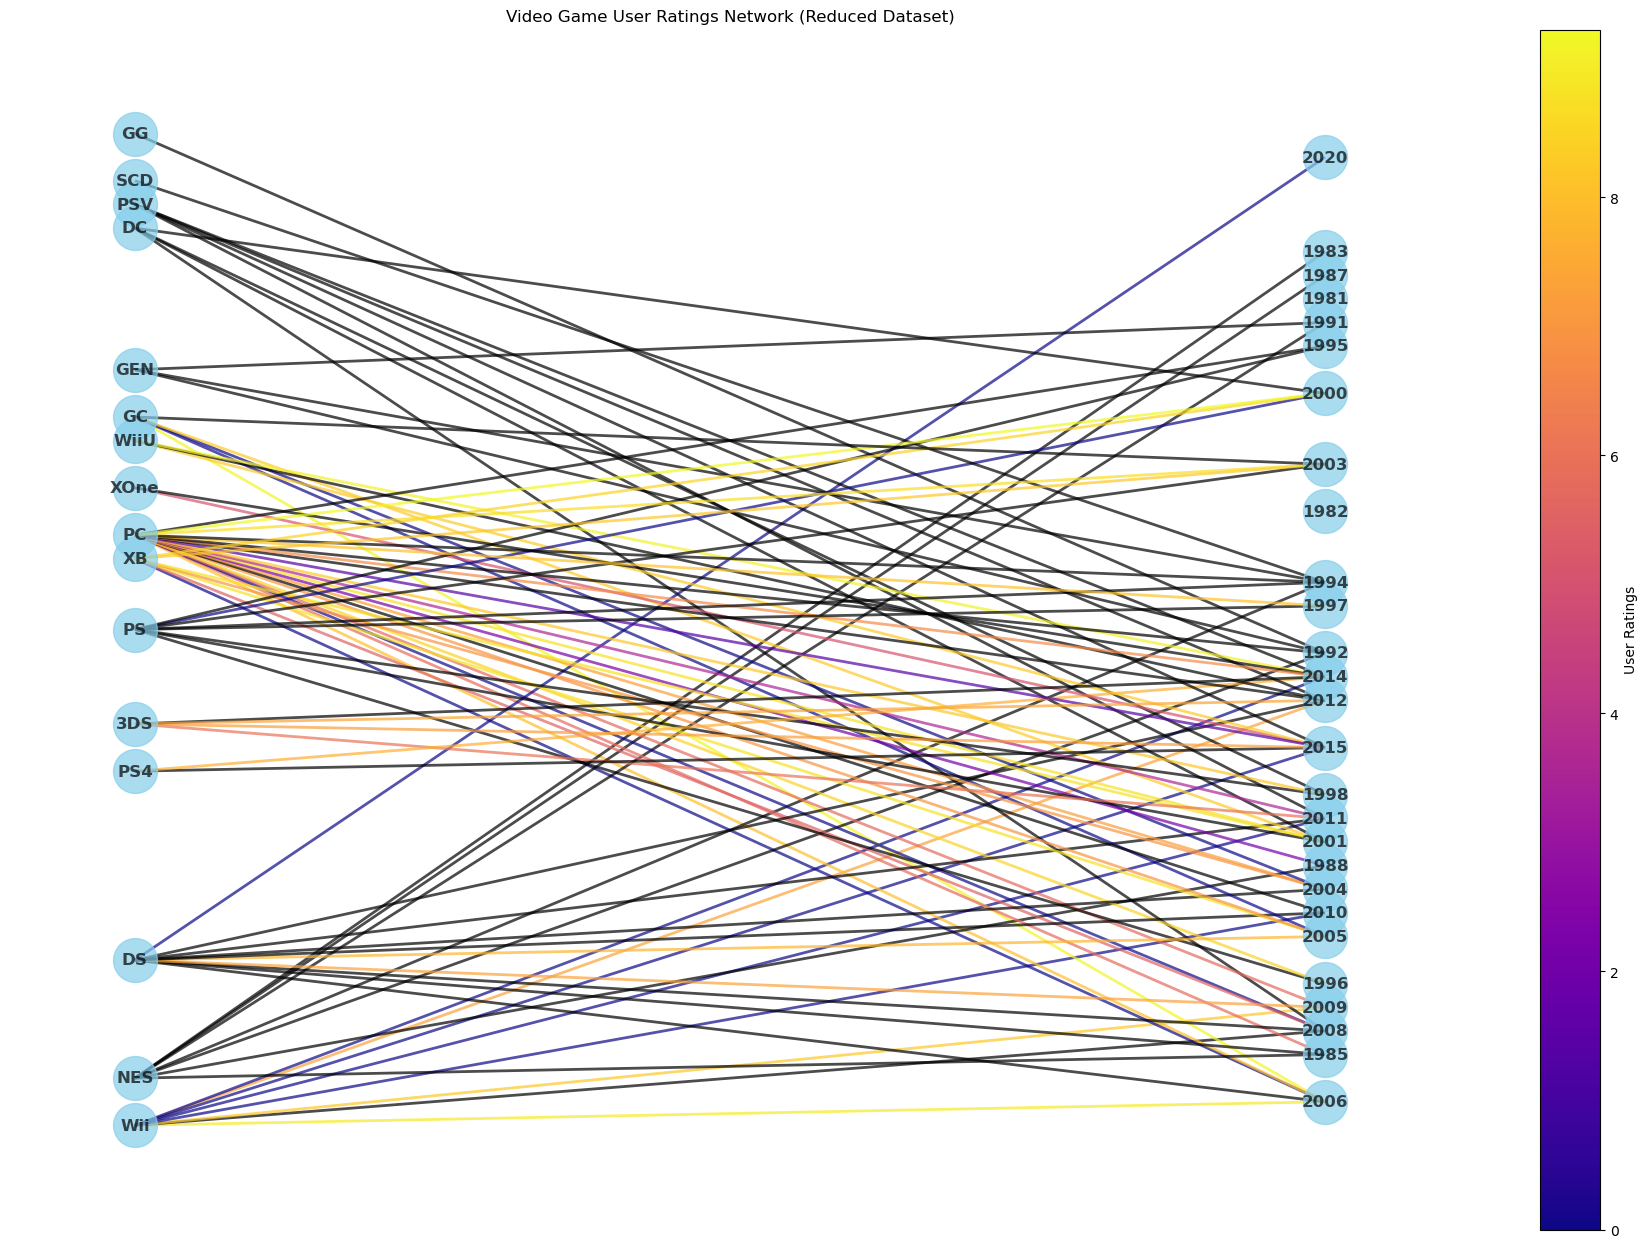

In [28]:
# The above graph is a mess. In addition to showing too many week connections in general, there is a decimal place in the year.

# Starting again and using the island method to distill the dataset.
# data first
url = 'https://raw.githubusercontent.com/evanmclaughlin/DATA-620/main/video_game_ratings.csv'
df = pd.read_csv(url)

# First removing the NAs in the game release year since it was breaking our code 
df = df.dropna(subset=['Year_of_Release'])

#bipartite graph
G = nx.Graph()

# nodes and edges, and removing decimal from year
for index, row in df.iterrows():
    platform = row['Platform']
    year = str(int(row['Year_of_Release']))  
    user_rating = row['User_Score']
    G.add_node(platform, bipartite=0)
    G.add_node(year, bipartite=1)
    G.add_edge(platform, year, weight=float(user_rating) if user_rating != 'tbd' else 0.0)

# I'm employing the island method in the function below
def island_method(graph, iterations=5, removal_fraction=0.1):
    for _ in range(iterations):
        # Identify nodes with low degrees
        nodes_to_remove = random.sample(list(graph.nodes()), int(removal_fraction * len(graph)))
        graph.remove_nodes_from(nodes_to_remove)
    return graph

# Employ function and visualize with the same format as the above graphic
G_reduced = island_method(G.copy(), iterations=5, removal_fraction=0.1)
plt.figure(figsize=(18, 12))
pos_reduced = {
    node: (1, i) if data['bipartite'] == 0 else 
               (2, i) for i, (node, data) in enumerate(G_reduced.nodes(data=True))
}
edge_weights_reduced = [G_reduced[u][v]['weight'] for u, v in G_reduced.edges()]
edge_colors_reduced = plt.cm.plasma([float(w) / max(edge_weights_reduced) for w in edge_weights_reduced])
nx.draw(G_reduced, pos_reduced, with_labels=True, font_weight='bold', node_size=1000,
        node_color='skyblue', edge_color=edge_colors_reduced, width=2, alpha=0.7)
sm_reduced = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0, vmax=max(edge_weights_reduced)))
sm_reduced._A = []
cbar_reduced = plt.colorbar(sm_reduced, orientation='vertical')
cbar_reduced.set_label('User Ratings')

plt.title('Video Game User Ratings Network (Reduced Dataset)')
plt.show()


In [27]:
'''
The condensed bipartite network display implies that, following the implementation of the island method, the complexity of the original network has been somewhat simplified. By eliminating a majority of low-degree nodes, less significant connections, the emphasis is now on stronger connections between platforms and years with higher user ratings.

The range in intensity of edge colors serves to signify different levels of user ratings, shedding light on the diverse preferences among users across various gaming platforms and years. This visualization brings a sharper focus to more influential relationships, potentially aiding in the identification of patterns and trends in user ratings within the dataset.

In general, the simplified network enables a more straightforward analysis of the fundamental structure and connections present in the video game user ratings dataset.

'''

'\nThe condensed bipartite network display implies that, following the implementation of the island method, the complexity of the original network has been somewhat simplified. By eliminating a majority of low-degree nodes, less significant connections, the emphasis is now on stronger connections between platforms and years with higher user ratings.\n\nThe range in intensity of edge colors serves to signify different levels of user ratings, shedding light on the diverse preferences among users across various gaming platforms and years. This visualization brings a sharper focus to more influential relationships, potentially aiding in the identification of patterns and trends in user ratings within the dataset.\n\nIn general, the simplified network enables a more straightforward analysis of the fundamental structure and connections present in the video game user ratings dataset.\n\n'